In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [112]:
# path to csv file with temprature and sensor data
path = "/content/drive/MyDrive/CoreAxon/Data/temperature_data.csv"

df = pd.read_csv(path)

In [113]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [109]:
type(df['timestamp'][1])

pandas._libs.tslibs.timestamps.Timestamp

##**Step-1  Reading and Processing Temperature Sensor Data**

In [107]:
df.head() # first 5 rows in the file

,timestamp,sensor_id,temperature
0,2023-06-01 00:00:00,1,22.5
1,2023-06-01 00:01:00,1,22.7
2,2023-06-01 00:02:00,1,22.6
3,2023-06-01 00:03:00,1,22.8
4,2023-06-01 00:04:00,1,22.9


In [5]:
df.tail() # last 5 rows in the file

,timestamp,sensor_id,temperature
115,2023-06-01 01:55:00,4,19.0
116,2023-06-01 01:56:00,4,19.1
117,2023-06-01 01:57:00,4,19.2
118,2023-06-01 01:58:00,4,19.3
119,2023-06-01 01:59:00,4,19.4


In [6]:
count = len(df)
print(count)

120


In [118]:
df['sensor_id'].unique()

array([1, 2, 3, 4])

In [119]:
mean_temperatures = df.groupby('sensor_id')['temperature'].mean()
median_temperatures = df.groupby('sensor_id')['temperature'].median()
SD_temperatures = df.groupby('sensor_id')['temperature'].std()

In [120]:
print("Mean Temperatures:")
print(mean_temperatures)
print("\nMedian Temperatures:")
print(median_temperatures)
print("\nStandard Deviation Temperatures:")
print(SD_temperatures)

Mean Temperatures:
sensor_id
1    0.518209
2   -0.725493
3    1.347343
4   -1.140060
Name: temperature, dtype: float64

Median Temperatures:
sensor_id
1    0.518209
2   -0.725493
3    1.347343
4   -1.140060
Name: temperature, dtype: float64

Standard Deviation Temperatures:
sensor_id
1    0.121111
2    0.121111
3    0.121111
4    0.121111
Name: temperature, dtype: float64


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

In [ ]:
rolling_average = df.rolling(window=5).mean()

In [76]:
sensor_dfs = {sensor: group for sensor, group in df.groupby('sensor_id')}

# Access each DataFrame by sensor number
sensor1_df = sensor_dfs[1]
sensor2_df = sensor_dfs[2]
sensor3_df = sensor_dfs[3]
sensor4_df = sensor_dfs[4]

In [78]:
sensor1_rolling = sensor1_df.rolling(window=5).mean()

In [104]:
sensor1_rolling

,sensor_id,temperature
timestamp,,
2023-06-01 00:00:00,NaN,NaN
2023-06-01 00:01:00,NaN,NaN
2023-06-01 00:02:00,NaN,NaN
2023-06-01 00:03:00,NaN,NaN
2023-06-01 00:04:00,1.0,22.70
2023-06-01 00:05:00,1.0,22.80
2023-06-01 00:06:00,1.0,22.88
2023-06-01 00:07:00,1.0,23.00
2023-06-01 00:08:00,1.0,23.10


In [80]:
sensor2_rolling = sensor2_df.rolling(window=5).mean()

In [82]:
sensor3_rolling = sensor3_df.rolling(window=5).mean()
sensor4_rolling = sensor4_df.rolling(window=5).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

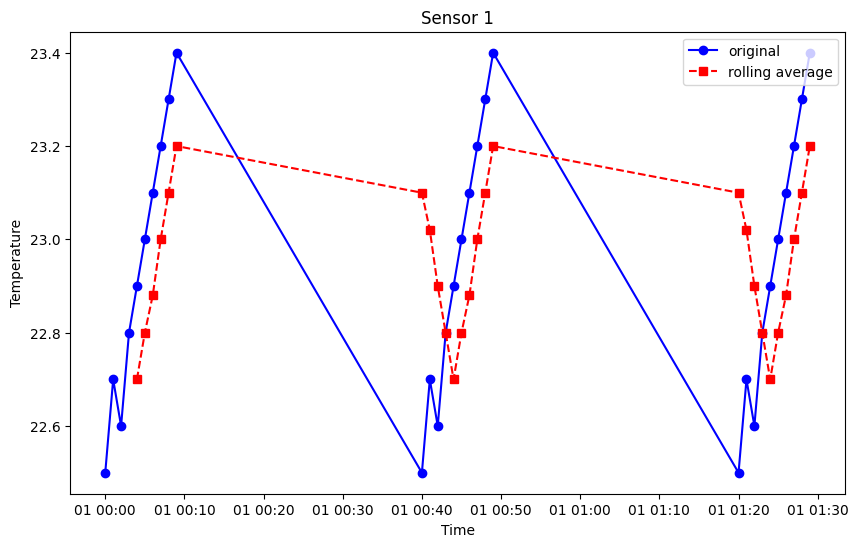

In [84]:
merged_df = pd.merge(sensor1_df, sensor1_rolling, on='timestamp', suffixes=('_old', '_new'))

plt.figure(figsize=(10,6))
plt.plot(merged_df['temperature_old'], label='original', marker = 'o', linestyle = '-', color = 'b')
plt.plot(merged_df['temperature_new'], label='rolling average', marker = 's', linestyle = '--', color = 'r')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Sensor 1')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

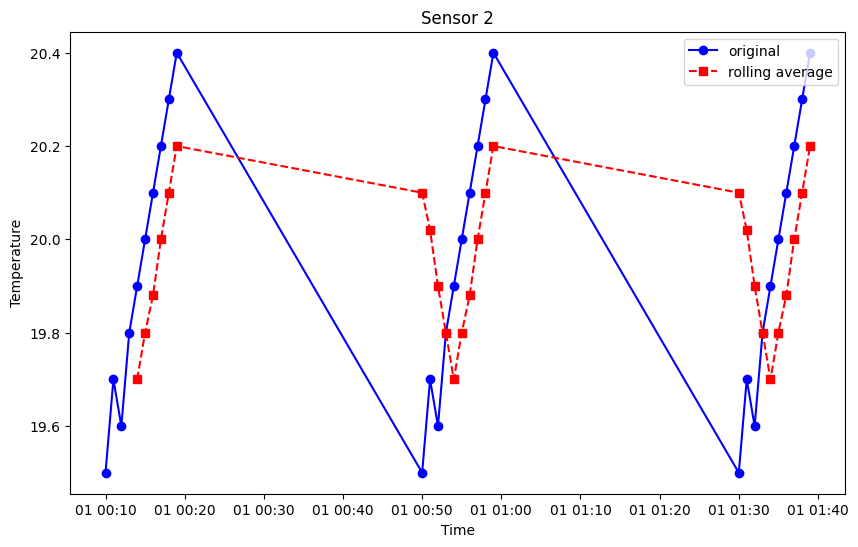

In [85]:
merged_df = pd.merge(sensor2_df, sensor2_rolling, on='timestamp', suffixes=('_old', '_new'))

plt.figure(figsize=(10,6))
plt.plot(merged_df['temperature_old'], label='original', marker = 'o', linestyle = '-', color = 'b')
plt.plot(merged_df['temperature_new'], label='rolling average', marker = 's', linestyle = '--', color = 'r')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Sensor 2')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

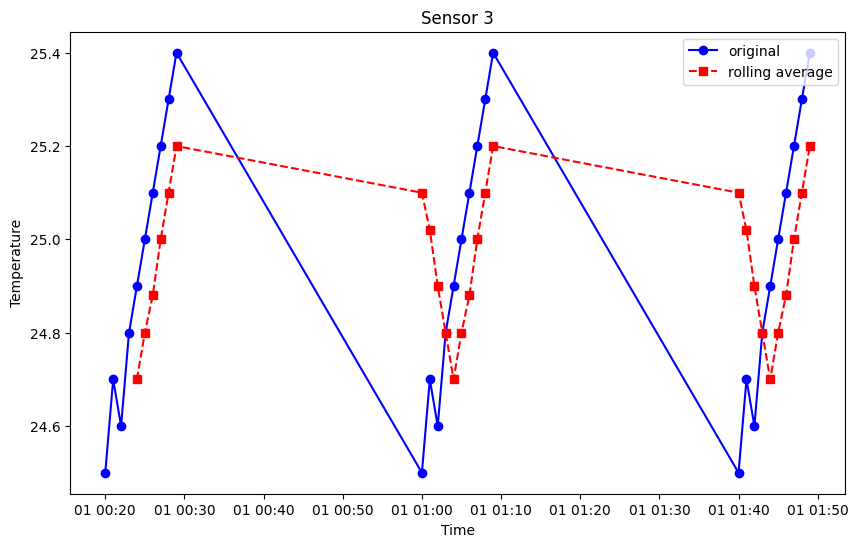

In [86]:
merged_df = pd.merge(sensor3_df, sensor3_rolling, on='timestamp', suffixes=('_old', '_new'))

plt.figure(figsize=(10,6))
plt.plot(merged_df['temperature_old'], label='original', marker = 'o', linestyle = '-', color = 'b')
plt.plot(merged_df['temperature_new'], label='rolling average', marker = 's', linestyle = '--', color = 'r')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Sensor 3')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

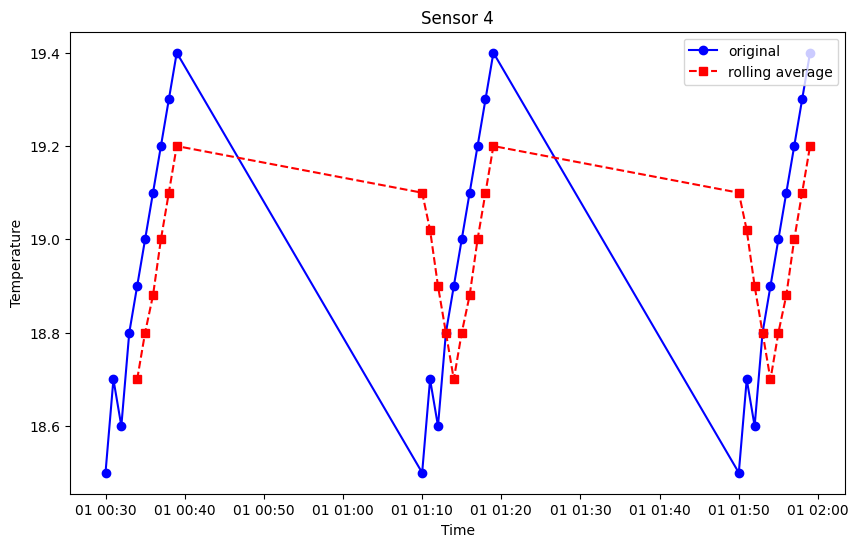

In [88]:
merged_df = pd.merge(sensor4_df, sensor4_rolling, on='timestamp', suffixes=('_old', '_new'))

plt.figure(figsize=(10,6))
plt.plot(merged_df['temperature_old'], label='original', marker = 'o', linestyle = '-', color = 'b')
plt.plot(merged_df['temperature_new'], label='rolling average', marker = 's', linestyle = '--', color = 'r')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Sensor 4')
plt.legend()
plt.show

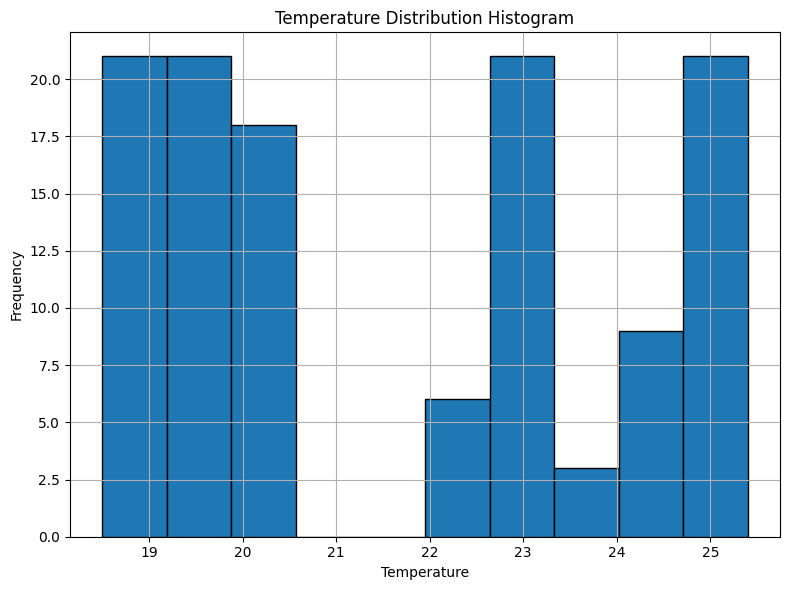

In [89]:
# Plotting histogram
plt.figure(figsize=(8, 6))

plt.hist(df['temperature'], bins=10, edgecolor='black')  # Adjust bins as needed for your data
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Distribution Histogram')

plt.grid(True)
plt.tight_layout()
plt.show()

In [93]:
transformed_data = rolling_average

In [103]:
transformed_data.iloc[1]

sensor_id     NaN
temperature   NaN
Name: 2023-06-01 00:01:00, dtype: float64

In [ ]:
transformed_data['timestamp']

##**Step 2: AI Model Training and Anomaly Detection**

In [ ]:
df = pd.DataFrame(df)

# Convert timestamp to datetime if it's not already in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Normalize temperature data (optional but recommended for neural networks)
df['temperature'] = (df['temperature'] - df['temperature'].mean()) / df['temperature'].std()

# Split data into train and test sets
train_size = int(len(df) * 0.8)  # 80% train, 20% test
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

In [ ]:
# Convert DataFrame to numpy arrays
X_train = np.array(train_df['temperature']).reshape(-1, 1)
X_test = np.array(test_df['temperature']).reshape(-1, 1)

# Autoencoder model architecture
input_dim = X_train.shape[1]
encoding_dim = 1  # Example encoding dimension

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='linear')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

Epoch 1/50
6/6 [==============================] - 2s 32ms/step - loss: 3.5362 - val_loss: 5.0772
Epoch 2/50
6/6 [==============================] - 0s 7ms/step - loss: 3.4766 - val_loss: 4.9922
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 3.4131 - val_loss: 4.9097
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 3.3523 - val_loss: 4.8294
Epoch 5/50
6/6 [==============================] - 0s 7ms/step - loss: 3.2943 - val_loss: 4.7510
Epoch 6/50
6/6 [==============================] - 0s 7ms/step - loss: 3.2438 - val_loss: 4.6718
Epoch 7/50
6/6 [==============================] - 0s 7ms/step - loss: 3.1844 - val_loss: 4.5976
Epoch 8/50
6/6 [==============================] - 0s 6ms/step - loss: 3.1322 - val_loss: 4.5252
Epoch 9/50
6/6 [==============================] - 0s 6ms/step - loss: 3.0792 - val_loss: 4.4557
Epoch 10/50
6/6 [==============================] - 0s 6ms/step - loss: 3.0288 - val_loss: 4.3880
Epoch 11/50
6/6 [=====================

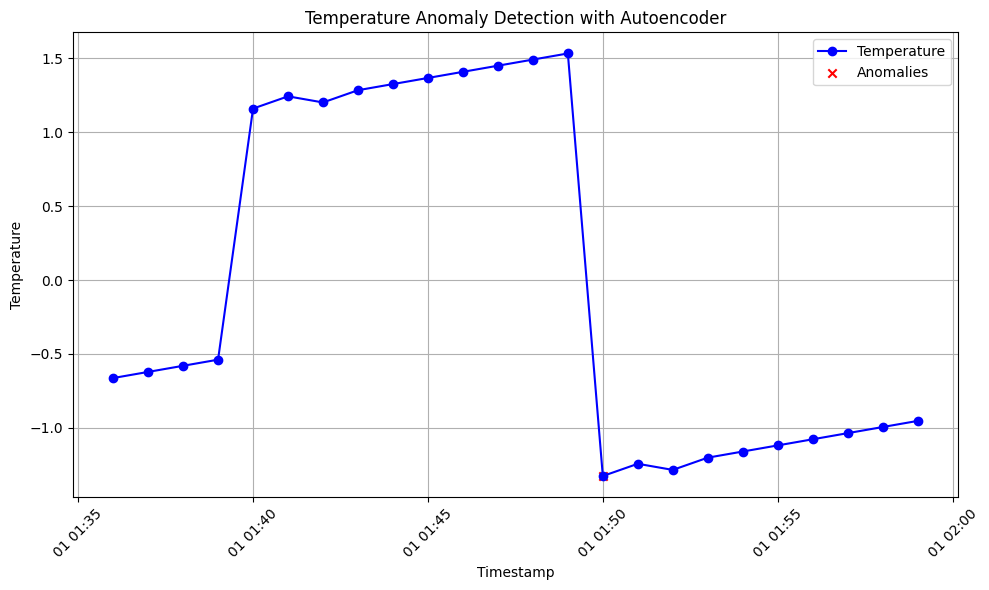

In [114]:
# Train the autoencoder model
autoencoder.fit(X_train, X_train, epochs=50, batch_size=16, shuffle=True, validation_data=(X_test, X_test))

# Anomaly detection function
def detect_anomalies(data):
    reconstructions = autoencoder.predict(data)
    mse = np.mean(np.square(data - reconstructions), axis=1)
    return mse

# Detect anomalies in test data
test_data = np.array(test_df['temperature']).reshape(-1, 1)
anomaly_scores = detect_anomalies(test_data)

# Plotting anomalies
plt.figure(figsize=(10, 6))

plt.plot(test_df['timestamp'], test_df['temperature'], marker='o', linestyle='-', color='b', label='Temperature')

# Highlight anomalies (threshold example)
threshold = np.mean(anomaly_scores) + 2 * np.std(anomaly_scores)
anomalies = test_df[anomaly_scores > threshold]
plt.scatter(anomalies['timestamp'], anomalies['temperature'], color='r', marker='x', label='Anomalies')

plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Temperature Anomaly Detection with Autoencoder')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [115]:
model_filename = 'autoencoder_model.h5'
autoencoder.save(model_filename)
print(f"Autoencoder model saved to {model_filename}")

Autoencoder model saved to autoencoder_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
